In [15]:

import json
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('stopwords')
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anest\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# SUMMARIES

summaries = json.load(open('./data/generated_data/summary_dataset.json'))
summ_keys = summaries.keys()

summ_char_lens = []
summ_word_lens = []

summary_lens = {
    '0-20': 0,
    '20-60': 0,
    '60-100': 0,
    '100-150': 0,
    '150-300': 0,
    '300-500': 0,
    '500+': 0,
}

summ_words = {}
word_count = 0

for key in summ_keys:
    summ_char_lens.append(len(summaries[key]))
    words = nltk.word_tokenize(summaries[key])
    words = [word.lower() for word in words if word.isalpha()]
    summ_word_lens.append(len(word_tokenize(' '.join(words))))
    
    for word in word_tokenize(' '.join(words)):
        word_count += 1
        if word not in summ_words.keys():
            summ_words[word] = 1
        else:
            summ_words[word] += 1
    
    if len(word_tokenize(' '.join(words))) < 20:
        summary_lens['0-20'] += 1
    elif len(word_tokenize(' '.join(words))) >= 20 and len(word_tokenize(' '.join(words))) < 60:
        summary_lens['20-60'] += 1
    elif len(word_tokenize(' '.join(words))) >= 60 and len(word_tokenize(' '.join(words))) < 100:
        summary_lens['60-100'] += 1
    elif len(word_tokenize(' '.join(words))) >= 100 and len(word_tokenize(' '.join(words))) < 150:
        summary_lens['100-150'] += 1
    elif len(word_tokenize(' '.join(words))) >= 150 and len(word_tokenize(' '.join(words))) < 300:
        summary_lens['150-300'] += 1     
    elif len(word_tokenize(' '.join(words))) >= 300 and len(word_tokenize(' '.join(words))) < 500:
        summary_lens['300-500'] += 1    
    elif len(word_tokenize(' '.join(words))) >= 500:
        summary_lens['500+'] += 1

print('Number of summaries: ', len(summ_keys))
print('Max length of summaries (character-based): ', max(summ_char_lens))
print('Max length of summaries (word-based): ', max(summ_word_lens))

print('Min length of summaries (character-based): ', min(summ_char_lens))
print('Min length of summaries (word-based): ', min(summ_word_lens))

print('Mean length of summaries (character-based): ', round(sum(summ_char_lens) / len(summ_char_lens),2))
print('Mean length of summaries (word-based): ', round(sum(summ_word_lens) / len(summ_word_lens),2))

print('Unique Words: ', len(summ_words.keys()))
print('Total Words: ', word_count)

print('Most Frequent words: ', dict(Counter(summ_words).most_common(10)))

Number of summaries:  156
Max length of summaries (character-based):  6566
Max length of summaries (word-based):  1194
Min length of summaries (character-based):  92
Min length of summaries (word-based):  17
Mean length of summaries (character-based):  1172.31
Mean length of summaries (word-based):  215.4
Unique Words:  4037
Total Words:  33603
Most Frequent words:  {'.': 1730, ',': 1338, 'the': 1131, 'of': 811, 'and': 767, '-': 724, 'to': 702, 'a': 545, 'your': 471, 'in': 461}


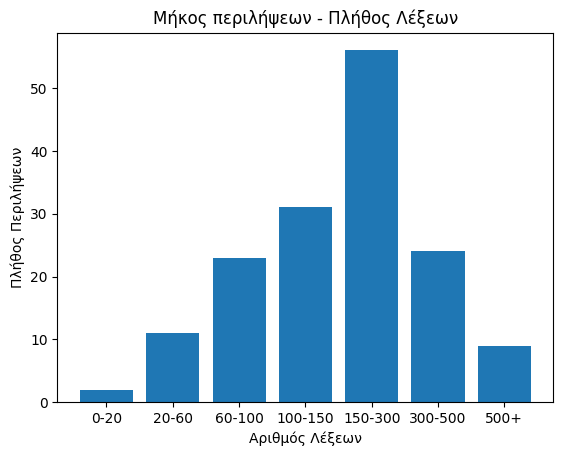

In [17]:
fig, ax = plt.subplots()

lens = list(summary_lens.keys())
counts = list(summary_lens.values())

ax.set_ylabel('Πλήθος Περιλήψεων')
ax.set_xlabel('Αριθμός Λέξεων')
ax.set_title('Μήκος περιλήψεων - Πλήθος Λέξεων')

ax.bar(lens, counts)

plt.show()

In [18]:
# QUESTIONS

questions = json.load(open('./data/generated_data/gen_dataset.json'))['data']['questions']

ques_char_lens = []
ques_word_lens = []

question_lens = {
    '0-3': 0,
    '3-5': 0,
    '5-7': 0,
    '7-9': 0,
    '9-15': 0,
    '15-20': 0,
    '20+': 0,
}

ques_words = {}
word_count = 0

for ques in questions:
    ques_char_lens.append(len(ques))
    words = nltk.word_tokenize(ques)
    words = [word.lower() for word in words if word.isalpha()]
    ques_word_lens.append(len(word_tokenize(' '.join(words))))
    for word in word_tokenize(' '.join(words)):
        word_count += 1
        if word not in ques_words.keys():
            ques_words[word] = 1
        else:
            ques_words[word] += 1
    
    
    if len(word_tokenize(' '.join(words))) < 3:
        question_lens['0-3'] += 1
    elif len(word_tokenize(' '.join(words))) >= 3 and len(word_tokenize(' '.join(words))) < 5:
        question_lens['3-5'] += 1
    elif len(word_tokenize(' '.join(words))) >= 5 and len(word_tokenize(' '.join(words))) < 7:
        question_lens['5-7'] += 1
    elif len(word_tokenize(' '.join(words))) >= 7 and len(word_tokenize(' '.join(words))) < 9:
        question_lens['7-9'] += 1
    elif len(word_tokenize(' '.join(words))) >= 9 and len(word_tokenize(' '.join(words))) < 15:
        question_lens['9-15'] += 1     
    elif len(word_tokenize(' '.join(words))) >= 15 and len(word_tokenize(' '.join(words))) < 20:
        question_lens['15-20'] += 1    
    elif len(word_tokenize(' '.join(words))) >= 20:
        question_lens['20+'] += 1

print('Number of questions: ', len(questions))
print('Max length of questions (character-based): ', max(ques_char_lens))
print('Max length of questions (word-based): ', max(ques_word_lens))

print('Min length of questions (character-based): ', min(ques_char_lens))
print('Min length of questions (word-based): ', min(ques_word_lens))

print('Mean length of questions (character-based): ', round(sum(ques_char_lens) / len(summ_char_lens),2))
print('Mean length of questions (word-based): ', round(sum(ques_word_lens) / len(ques_word_lens),2))

print('Unique Words: ', len(ques_words.keys()))
print('Total Words: ', word_count)

print('Most Frequent words: ', dict(Counter(ques_words).most_common(10)))

Number of questions:  5294
Max length of questions (character-based):  944
Max length of questions (word-based):  192
Min length of questions (character-based):  12
Min length of questions (word-based):  3
Mean length of questions (character-based):  1945.34
Mean length of questions (word-based):  11.13
Unique Words:  3141
Total Words:  58942
Most Frequent words:  {'?': 5128, 'what': 4283, 'the': 2373, 'of': 2061, 'is': 1830, 'to': 1094, 'a': 1069, 'in': 815, 'do': 788, 'are': 769}


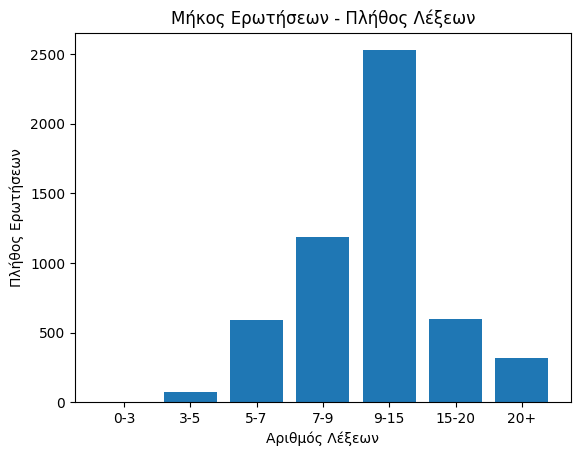

In [19]:
fig, ax = plt.subplots()

lens = list(question_lens.keys())
counts = list(question_lens.values())

ax.set_ylabel('Πλήθος Ερωτήσεων')
ax.set_xlabel('Αριθμός Λέξεων')
ax.set_title('Μήκος Ερωτήσεων - Πλήθος Λέξεων')

ax.bar(lens, counts)

plt.show()

In [20]:
# ANSWERS

answers = json.load(open('./data/generated_data/gen_dataset.json'))['data']['answers']

ans_char_lens = []
ans_word_lens = []

answer_lens = {
    '0': 0,
    '0-3': 0,
    '3-5': 0,
    '5-7': 0,
    '7-9': 0,
    '9-15': 0,
    '15-20': 0,
    '20+': 0,
}

ans_words = {}
word_count = 0

for ans in answers:
    ans_char_lens.append(len(ans))
    words = nltk.word_tokenize(ans)
    words = [word.lower() for word in words if word.isalpha()]
    ans_word_lens.append(len(word_tokenize(' '.join(words))))
    
    for word in word_tokenize(' '.join(words)):
        word_count += 1
        if word not in ans_words.keys():
            ans_words[word] = 1
        else:
            ans_words[word] += 1
    
    if len(word_tokenize(' '.join(words))) == 0:
        answer_lens['0'] += 1
    elif len(word_tokenize(' '.join(words))) < 3:
        answer_lens['0-3'] += 1
    elif len(word_tokenize(' '.join(words))) >= 3 and len(word_tokenize(' '.join(words))) < 5:
        answer_lens['3-5'] += 1
    elif len(word_tokenize(' '.join(words))) >= 5 and len(word_tokenize(' '.join(words))) < 7:
        answer_lens['5-7'] += 1
    elif len(word_tokenize(' '.join(words))) >= 7 and len(word_tokenize(' '.join(words))) < 9:
        answer_lens['7-9'] += 1
    elif len(word_tokenize(' '.join(words))) >= 9 and len(word_tokenize(' '.join(words))) < 15:
        answer_lens['9-15'] += 1     
    elif len(word_tokenize(' '.join(words))) >= 15 and len(word_tokenize(' '.join(words))) < 20:
        answer_lens['15-20'] += 1    
    elif len(word_tokenize(' '.join(words))) >= 20:
        answer_lens['20+'] += 1

print('Number of answers: ', len(answers))
print('Max length of answers (character-based): ', max(ans_char_lens))
print('Max length of answers (word-based): ', max(ans_word_lens))

print('Min length of answers (character-based): ', min(ans_char_lens))
print('Min length of answers (word-based): ', min(ans_word_lens))

print('Mean length of answers (character-based): ', round(sum(ans_char_lens) / len(ans_char_lens),2))
print('Mean length of answers (word-based): ', round(sum(ans_word_lens) / len(ans_word_lens),2))

print('Unique Words: ', len(ans_words.keys()))
print('Total Words: ', word_count)
print('Most Frequent words: ', dict(Counter(ans_words).most_common(10)))

Number of answers:  5690
Max length of answers (character-based):  6566
Max length of answers (word-based):  1194
Min length of answers (character-based):  1
Min length of answers (word-based):  1
Mean length of answers (character-based):  88.43
Mean length of answers (word-based):  15.88
Unique Words:  5834
Total Words:  90353
Most Frequent words:  {'.': 3704, ',': 3286, 'the': 3094, 'and': 2171, 'of': 2122, 'to': 1780, '-': 1699, 'a': 1423, 'or': 1394, 'in': 1281}


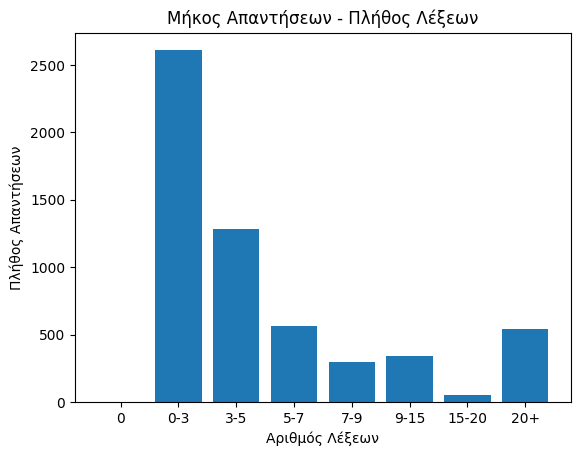

In [21]:
fig, ax = plt.subplots()

lens = list(answer_lens.keys())
counts = list(answer_lens.values())

ax.set_ylabel('Πλήθος Απαντήσεων')
ax.set_xlabel('Αριθμός Λέξεων')
ax.set_title('Μήκος Απαντήσεων - Πλήθος Λέξεων')

ax.bar(lens, counts)

plt.show()

In [22]:
# DOCUMENTS

documents = json.load(open('./data/generated_data/gen_dataset.json'))['data']['dialogs']

doc_char_lens = []
doc_word_lens = []

document_lens = {
    '0-1': 0,
    '1-3': 0,
    '3-5': 0,
    '5-10': 0,
    '10-15': 0,
    '15-30': 0,
    '30+': 0,
}

doc_words = {}
word_count = 0

for d in range(len(documents)):
    doc_char_lens.append(len(documents[d]['document']))
    words = nltk.word_tokenize(documents[d]['document'])
    words = [word.lower() for word in words if word.isalpha()]
    doc_word_lens.append(len(word_tokenize(' '.join(words))))
    
    for word in word_tokenize(' '.join(words)):
        word_count += 1
        if word not in doc_words.keys():
            doc_words[word] = 1
        else:
            doc_words[word] += 1
    
    if len(word_tokenize(' '.join(words))) < 100:
        document_lens['0-1'] += 1
    elif len(word_tokenize(' '.join(words))) >= 100 and len(word_tokenize(' '.join(words))) < 300:
        document_lens['1-3'] += 1
    elif len(word_tokenize(' '.join(words))) >= 300 and len(word_tokenize(' '.join(words))) < 500:
        document_lens['3-5'] += 1
    elif len(word_tokenize(' '.join(words))) >= 500 and len(word_tokenize(' '.join(words))) < 1000:
        document_lens['5-10'] += 1
    elif len(word_tokenize(' '.join(words))) >= 1000 and len(word_tokenize(' '.join(words))) < 1500:
        document_lens['10-15'] += 1     
    elif len(word_tokenize(' '.join(words))) >= 1500 and len(word_tokenize(' '.join(words))) < 3000:
        document_lens['15-30'] += 1    
    elif len(word_tokenize(' '.join(words))) >= 3000:
        document_lens['30+'] += 1

print('Number of documents: ', len(documents))
print('Max length of documents (character-based): ', max(doc_char_lens))
print('Max length of documents (word-based): ', max(doc_word_lens))

print('Min length of documents (character-based): ', min(doc_char_lens))
print('Min length of documents (word-based): ', min(doc_word_lens))

print('Mean length of documents (character-based): ', round(sum(doc_char_lens) / len(doc_char_lens),2))
print('Mean length of documents (word-based): ', round(sum(doc_word_lens) / len(doc_word_lens),2))

print('Unique Words: ', len(doc_words.keys()))
print('Total Words: ', word_count)
print('Most Frequent words: ', dict(Counter(doc_words).most_common(10)))

Number of documents:  156
Max length of documents (character-based):  47835
Max length of documents (word-based):  8956
Min length of documents (character-based):  539
Min length of documents (word-based):  95
Mean length of documents (character-based):  8621.65
Mean length of documents (word-based):  1582.65
Unique Words:  10324
Total Words:  246893
Most Frequent words:  {'.': 12387, ',': 10241, 'the': 8180, 'and': 5728, 'of': 5512, 'to': 5236, 'a': 4560, 'your': 3907, 'or': 3656, 'in': 3179}


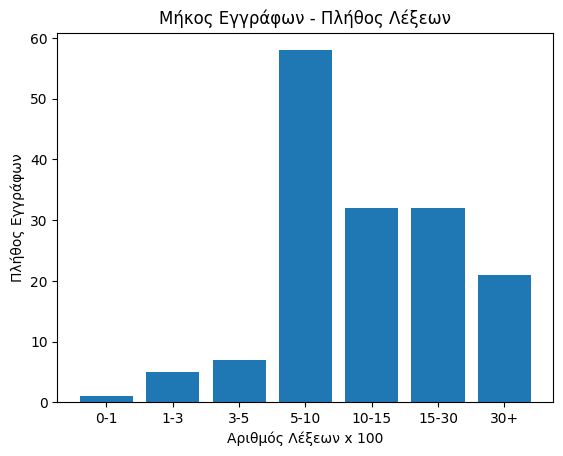

In [23]:
fig, ax = plt.subplots()

lens = list(document_lens.keys())
counts = list(document_lens.values())

ax.set_ylabel('Πλήθος Εγγράφων')
ax.set_xlabel('Αριθμός Λέξεων x 100')
ax.set_title('Μήκος Εγγράφων - Πλήθος Λέξεων')

ax.bar(lens, counts)

plt.show()

In [24]:
dialogs = json.load(open('./data/generated_data/gen_dataset.json'))['data']['dialogs']

qa_counts = []

for dial in dialogs:
    qa_counts.append(len(dial['dialog']))

print('Number of Question-Answer Pairs in Dialogs: ', len(qa_counts))
print('Max Number of Question-Answer Pairs in Dialogs: ', max(qa_counts))
print('Min Number of Question-Answer Pairs in Dialogs: ', min(qa_counts))
print('Mean Number of Question-Answer Pairs in Dialogs: ', round(sum(qa_counts) / len(qa_counts), 2))

qa_lens = {
    '0-5': 0,
    '5-20': 0,
    '20-40': 0,
    '40-60': 0,
    '60-80':0,
    '80+': 0,
}

for dial in dialogs:
    if len(dial['dialog']) < 5:
        qa_lens['0-5'] += 1
    elif len(dial['dialog']) >= 5 and len(dial['dialog']) < 20:
        qa_lens['5-20'] += 1
    elif len(dial['dialog']) >= 20 and len(dial['dialog']) < 40:
        qa_lens['20-40'] += 1
    elif len(dial['dialog']) >= 40 and len(dial['dialog']) < 60:
        qa_lens['40-60'] += 1 
    elif len(dial['dialog']) >= 60 and len(dial['dialog']) < 80:
        qa_lens['60-80'] += 1   
    elif len(dial['dialog']) >= 80:
        qa_lens['80+'] += 1


Number of Question-Answer Pairs in Dialogs:  156
Max Number of Question-Answer Pairs in Dialogs:  159
Min Number of Question-Answer Pairs in Dialogs:  1
Mean Number of Question-Answer Pairs in Dialogs:  33.94


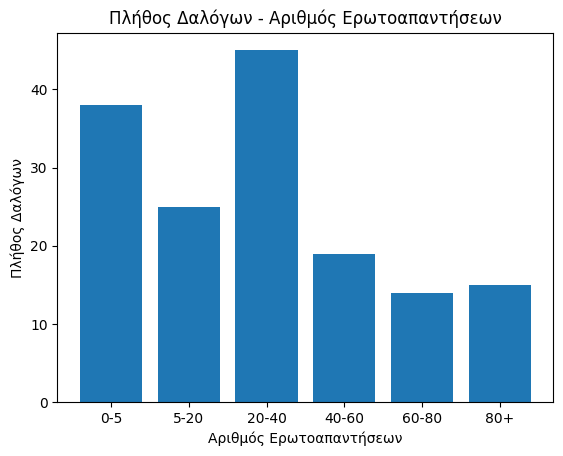

In [25]:
fig, ax = plt.subplots()

lens = list(qa_lens.keys())
counts = list(qa_lens.values())

ax.set_ylabel('Πλήθος Δαλόγων')
ax.set_xlabel('Αριθμός Ερωτοαπαντήσεων')
ax.set_title('Πλήθος Δαλόγων - Αριθμός Ερωτοαπαντήσεων')

ax.bar(lens, counts)

plt.show()

In [26]:
# Train-Val Questions-Answers

data = json.load(open('./data/generated_data/gen_dataset.json'))['data']

train_ans = []
train_ques = []

val_ans = []
val_ques = []

for i in range(156):
    for dial in  data['dialogs'][i]['dialog']:
        for ans in dial['answer_options']:
            if i < 117:
                if ans not in train_ans:
                    train_ans.append(ans)
            else:
                if ans not in val_ans:
                    val_ans.append(ans)
print(len(train_ans), len(val_ans), len(data['answers']))

for i in range(156):
    for dial in data['dialogs'][i]['dialog']:
        if i < 117:
            if dial['question'] not in train_ques:
                train_ques.append(dial['question'])
        else:
            if dial['question'] not in val_ques:
                val_ques.append(dial['question'])

print(len(train_ques), len(val_ques), len(data['questions']))




4062 1628 5690
3763 1531 5294
